In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular

### Problem 5

#### 1.

In [2]:
n = 63
A = np.diag(2*np.ones(n)) + np.diag(-np.ones(n-1), k=1) + np.diag(-np.ones(n-1), k=-1)
b = 0.5 * np.cos(np.arange(1, n+1))

x_tilde = np.linalg.solve(A, b)

backward_error = np.linalg.norm(np.dot(A, x_tilde) - b, ord=np.inf) / np.linalg.norm(b, ord=np.inf)

print(f'The ∞-norm backward error is: {backward_error}')


The ∞-norm backward error is: 6.661599106605427e-16


#### 2.

In [3]:
def jacobi(A, b, x0, max_iter):
    n = len(A)
    D = np.diag(np.diag(A))
    L_plus_D_inv = np.linalg.inv(np.tril(A, -1) + D)
    x = x0.copy()
    err_norms = []
    for _ in range(max_iter):
        x_new = x + solve_triangular(D, b - np.dot(A, x), lower=False)
        err_norms.append(np.linalg.norm(x_new - x_tilde, ord=np.inf))
        x = x_new
    return err_norms

def gauss_seidel(A, b, x0, max_iter):
    n = len(A)
    L_plus_D_inv_b = solve_triangular(np.tril(A, -1) + np.diag(np.diag(A)), b, lower=True)
    x = x0.copy()
    err_norms = []
    for _ in range(max_iter):
        x_new = x + solve_triangular(np.tril(A), b - np.dot(A, x), lower=True)
        err_norms.append(np.linalg.norm(x_new - x_tilde, ord=np.inf))
        x = x_new
    return err_norms

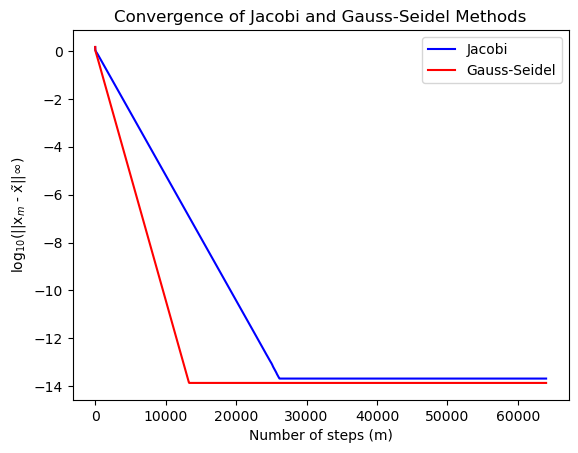

In [4]:
n = 63
A = np.diag(2*np.ones(n)) + np.diag(-np.ones(n-1), k=1) + np.diag(-np.ones(n-1), k=-1)
b = 0.5 * np.cos(np.arange(1, n+1))

D = np.diag(np.diag(A))
L_plus_D_inv_b = solve_triangular(np.tril(A, -1) + D, b, lower=True)
I_minus_LD_inv_A = -np.dot(solve_triangular(np.tril(A, -1) + D, A, lower=True), np.triu(A, 1))

x0 = np.linspace(1/64, 63/64, n)

max_iter = 64000
jacobi_err = jacobi(A, b, x0, max_iter)
gauss_seidel_err = gauss_seidel(A, b, x0, max_iter)

plt.plot(np.arange(1, max_iter+1), np.log10(jacobi_err), label='Jacobi', c='b')
plt.plot(np.arange(1, max_iter+1), np.log10(gauss_seidel_err), label='Gauss-Seidel', c='r')
plt.xlabel('Number of steps (m)')
plt.ylabel('log$_{10}$(||x$_m$ - x̃||∞)')
plt.title('Convergence of Jacobi and Gauss-Seidel Methods')
plt.legend()
plt.show()

### 3.

To estimate the asymptotic rates of convergence for both the Jacobi and Gauss-Seidel methods, we can look at how the error changes as a function of the number of iterations. Linear convergence should have a decrease in the error by a constant factor for each iteration.

Let's say the error at iteration $m$ is denoted by $e_m$, and let $e_{m+1}$ be the error at the next iteration. If the method converges linearly, we expect:

$e_{m+1} = c \cdot e_m$

Where $c$ is a constant. Taking the logarithm of both sides, we get:

$\log_{10}(e_{m+1}) = \log_{10}(c) + \log_{10}(e_m)$

So, if the method converges linearly, the plot of $\log_{10}(e_m)$ versus $m$ should be approximately a straight line with slope $\log_{10}(c)$.

In [5]:
jacobi_slope, _ = np.polyfit(np.log10(np.arange(1, max_iter+1)), np.log10(jacobi_err), 1)
gauss_seidel_slope, _ = np.polyfit(np.log10(np.arange(1, max_iter+1)), np.log10(gauss_seidel_err), 1)

print("Estimated slope for Jacobi method:", jacobi_slope)
print("Estimated slope for Gauss-Seidel method:", gauss_seidel_slope)

Estimated slope for Jacobi method: -9.026660419952195
Estimated slope for Gauss-Seidel method: -6.901440018616041
